In [1]:
#!pip install openpyxl
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")
veri=pd.read_excel("sınav.xlsx",header=1)
veri.drop(["L"],axis=1,inplace=True)

In [2]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DERSİN KODU    98 non-null     object        
 1   DERSİN ADI     98 non-null     object        
 2   T              98 non-null     int64         
 3   U              98 non-null     int64         
 4   AKTS           98 non-null     int64         
 5   Z/S            98 non-null     object        
 6   D              98 non-null     int64         
 7   BÖLÜM          98 non-null     object        
 8   BÖLÜM-2        98 non-null     object        
 9   ÖĞRETİM ÜYESİ  98 non-null     object        
 10  AÇIKLAMA       97 non-null     object        
 11  GÜN            98 non-null     datetime64[ns]
 12  SAAT           98 non-null     object        
dtypes: datetime64[ns](1), int64(4), object(8)
memory usage: 10.1+ KB


In [3]:
veri.GÜN = pd.to_datetime(veri.GÜN)
veri["gün"] = veri.GÜN.dt.day
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DERSİN KODU    98 non-null     object        
 1   DERSİN ADI     98 non-null     object        
 2   T              98 non-null     int64         
 3   U              98 non-null     int64         
 4   AKTS           98 non-null     int64         
 5   Z/S            98 non-null     object        
 6   D              98 non-null     int64         
 7   BÖLÜM          98 non-null     object        
 8   BÖLÜM-2        98 non-null     object        
 9   ÖĞRETİM ÜYESİ  98 non-null     object        
 10  AÇIKLAMA       97 non-null     object        
 11  GÜN            98 non-null     datetime64[ns]
 12  SAAT           98 non-null     object        
 13  gün            98 non-null     int64         
dtypes: datetime64[ns](1), int64(5), object(8)
memory usage: 10.8+ KB


In [4]:
veri.gün.unique()

array([ 4,  5,  6,  7,  8,  9, 16, 24], dtype=int64)

In [5]:
for i in veri.select_dtypes(include=["object"]).columns:
    print("{0}".format(i),veri[i].unique().shape)
    if veri[i].unique().shape[0]<15:
        print("{0}".format(i),veri[i].unique())

DERSİN KODU (62,)
DERSİN ADI (54,)
Z/S (2,)
Z/S ['Z ' 'S ']
BÖLÜM (4,)
BÖLÜM ['YBS' 'İŞLETME' 'UAT' 'UTİ']
BÖLÜM-2 (14,)
BÖLÜM-2 ['YBS' 'İŞL' 'UAT+YBS' 'İŞL+UTİ' 'UTİ' 'İŞL+YBS' 'UAT' 'İŞL+UAT'
 'İŞL+UAT+YBS' 'UTİ+YBS+İŞL' 'UAT+YBS+İŞL' 'İŞL+UTİ+YBS' 'ORTAK' 'UTİ+YBS']
ÖĞRETİM ÜYESİ (24,)
AÇIKLAMA (29,)
SAAT (11,)
SAAT [datetime.time(10, 0) datetime.time(11, 0) datetime.time(12, 0)
 datetime.time(13, 0) datetime.time(14, 0) datetime.time(15, 0)
 datetime.time(16, 0) datetime.time(17, 0) datetime.time(16, 35)
 datetime.time(15, 45) datetime.time(9, 0)]


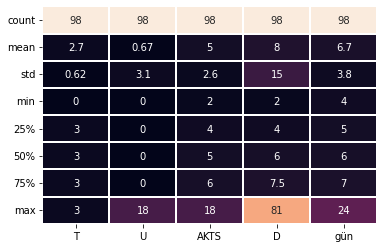

In [6]:
sbn.heatmap(veri.describe(),annot=True,cbar=False,linewidths=0.01);
#plt.savefig("temel-istatistik.png")

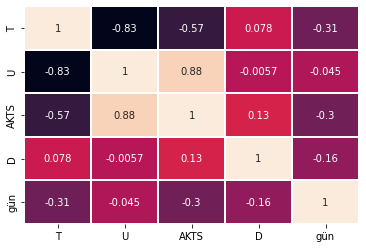

In [7]:
sbn.heatmap(veri.corr(),annot=True,cbar=False,linewidths=0.01);
#plt.savefig("korelasyon.png")

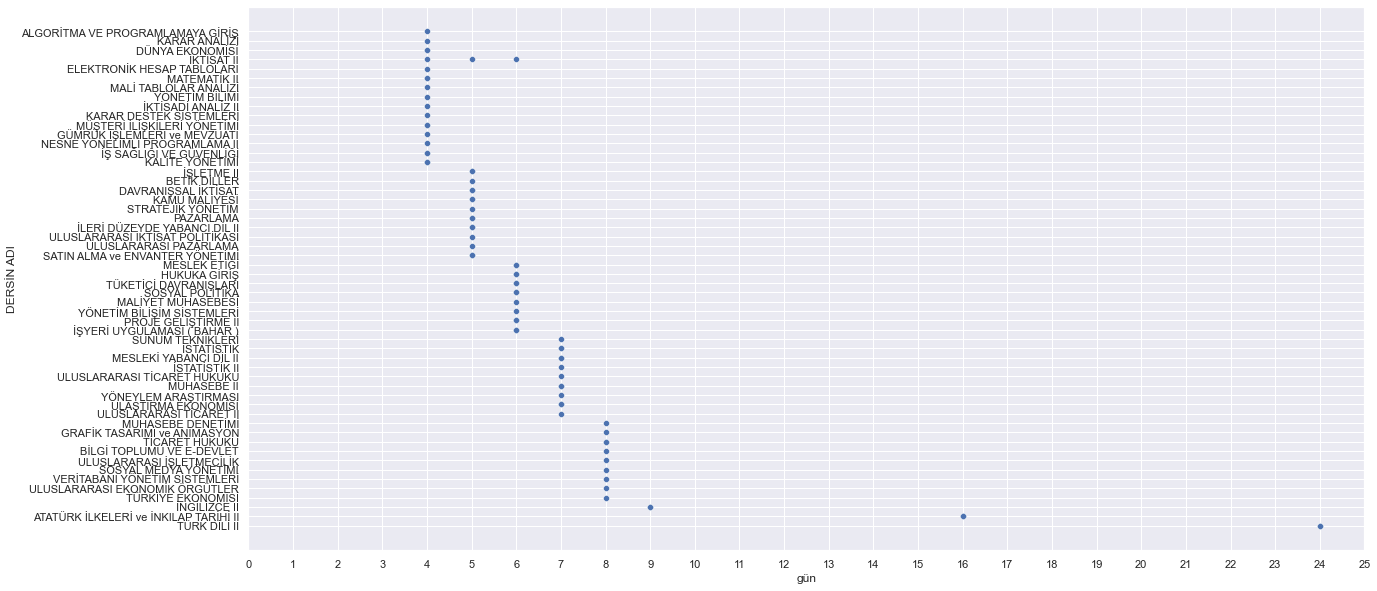

In [8]:
plt.figure(figsize=(20,10))
sbn.set_theme(style="darkgrid")
g = sbn.scatterplot(x="gün",y="DERSİN ADI",data=veri);
g.set_xticks(range(len(veri.loc[:25])));
#plt.savefig("gün-dersinadı.png")

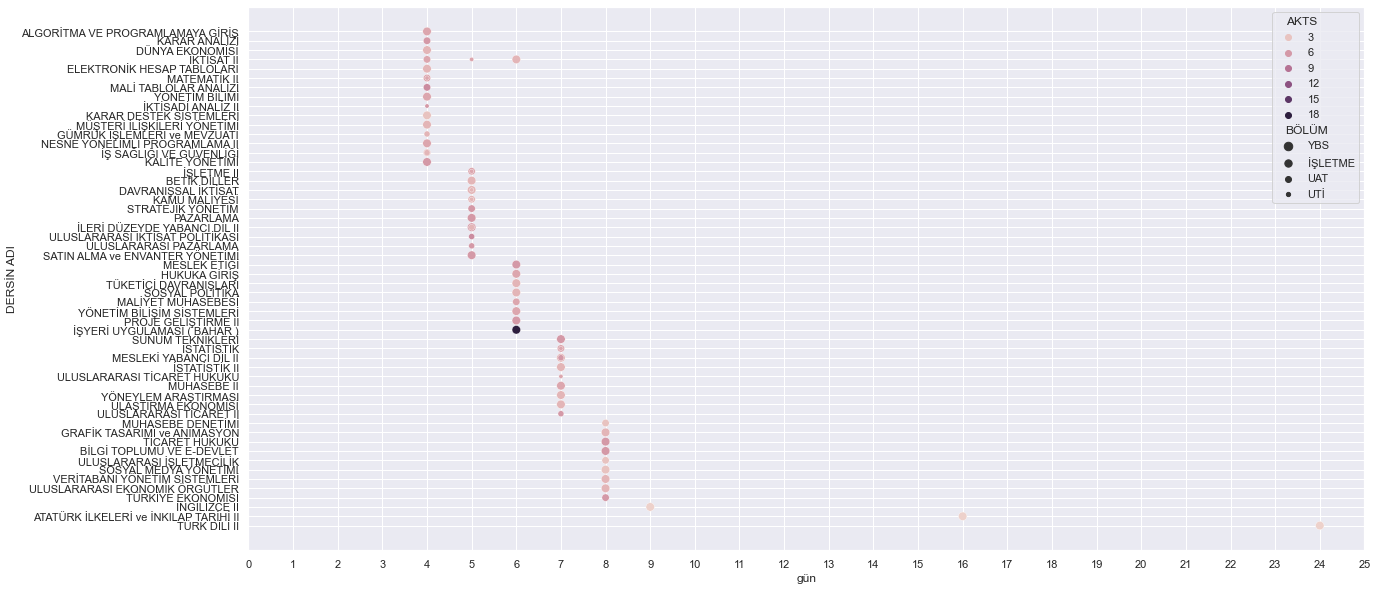

In [9]:
plt.figure(figsize=(20,10))
sbn.set_theme(style="darkgrid")
g = sbn.scatterplot(x="gün",y="DERSİN ADI",data=veri,hue="AKTS",size="BÖLÜM");
g.set_xticks(range(len(veri.loc[:25])));
#plt.savefig("gün-dersinadı-akts-bölüm.png")

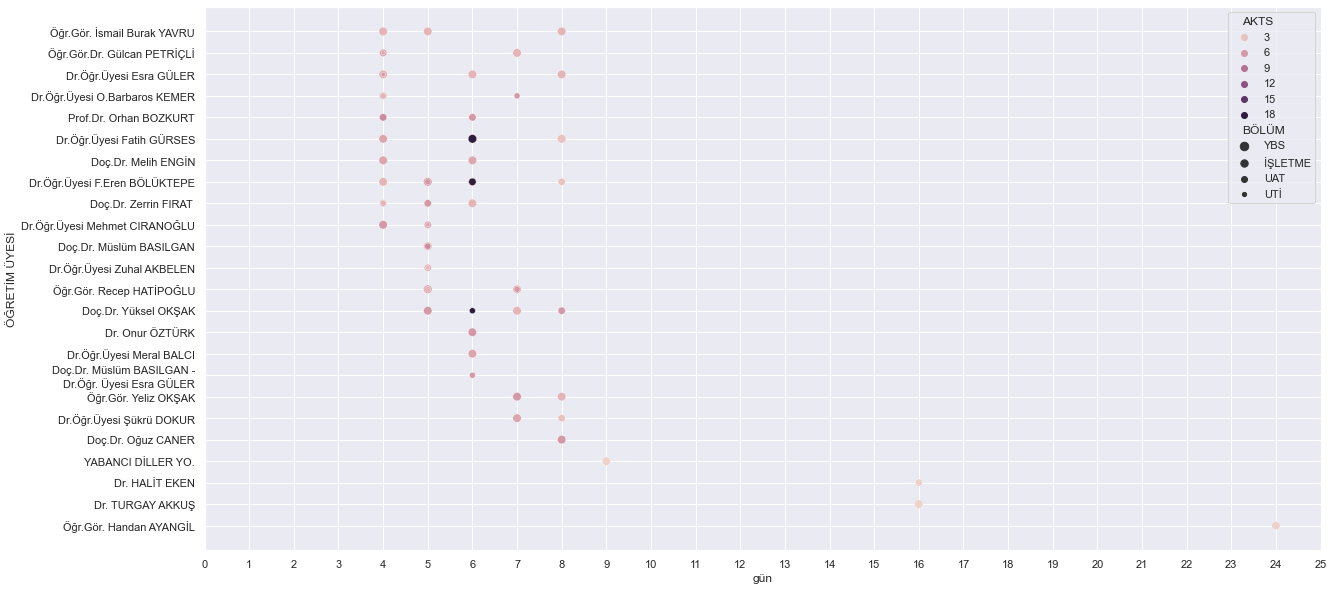

In [10]:
plt.figure(figsize=(20,10))
sbn.set_theme(style="darkgrid")
g = sbn.scatterplot(x="gün",y="ÖĞRETİM ÜYESİ",data=veri,hue="AKTS",size="BÖLÜM");
g.set_xticks(range(len(veri.loc[:25])));
#plt.savefig("gün-akademisyen-akts-bölüm.png")

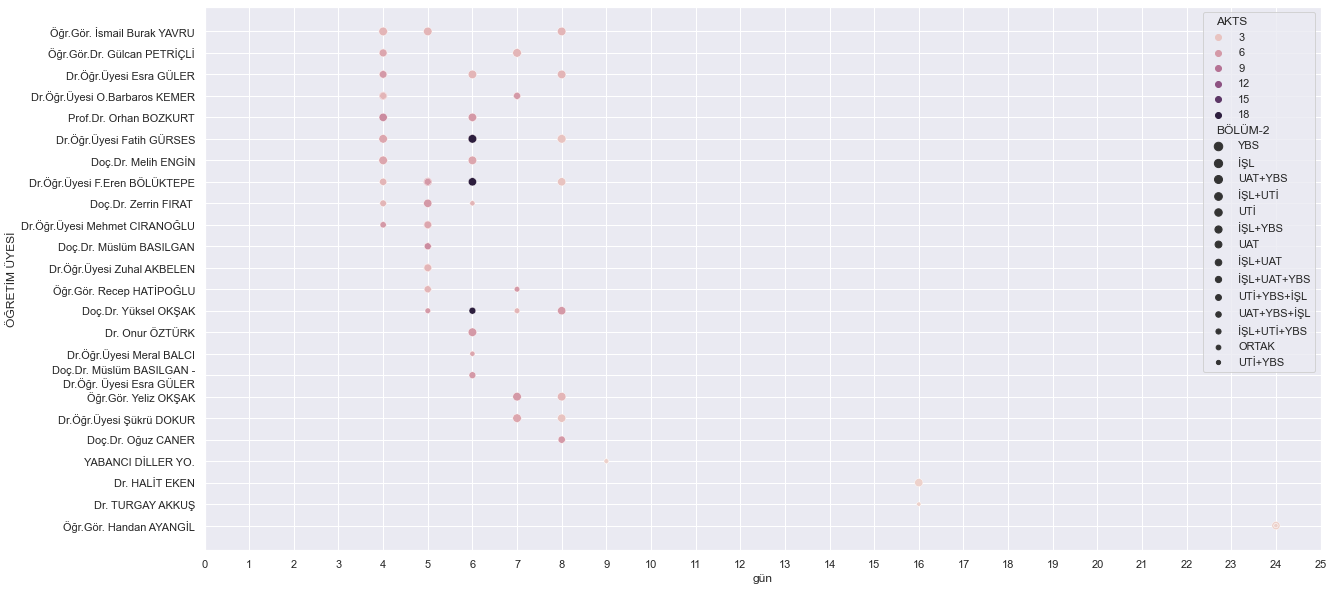

In [11]:
plt.figure(figsize=(20,10))
sbn.set_theme(style="darkgrid")
g = sbn.scatterplot(x="gün",y="ÖĞRETİM ÜYESİ",data=veri,hue="AKTS",size="BÖLÜM-2");
g.set_xticks(range(len(veri.loc[:25])));

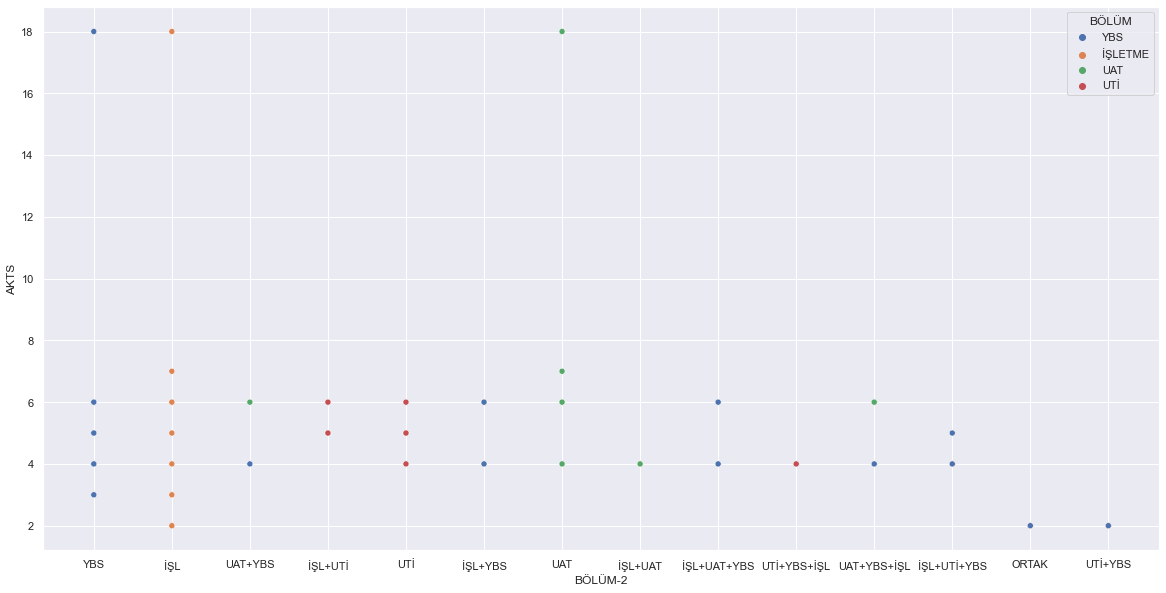

In [12]:
plt.figure(figsize=(20,10))
sbn.set_theme(style="darkgrid")
sbn.scatterplot(x="BÖLÜM-2",y="AKTS",data=veri,hue="BÖLÜM");
#plt.savefig("bölüm2-akts-bölüm.png")

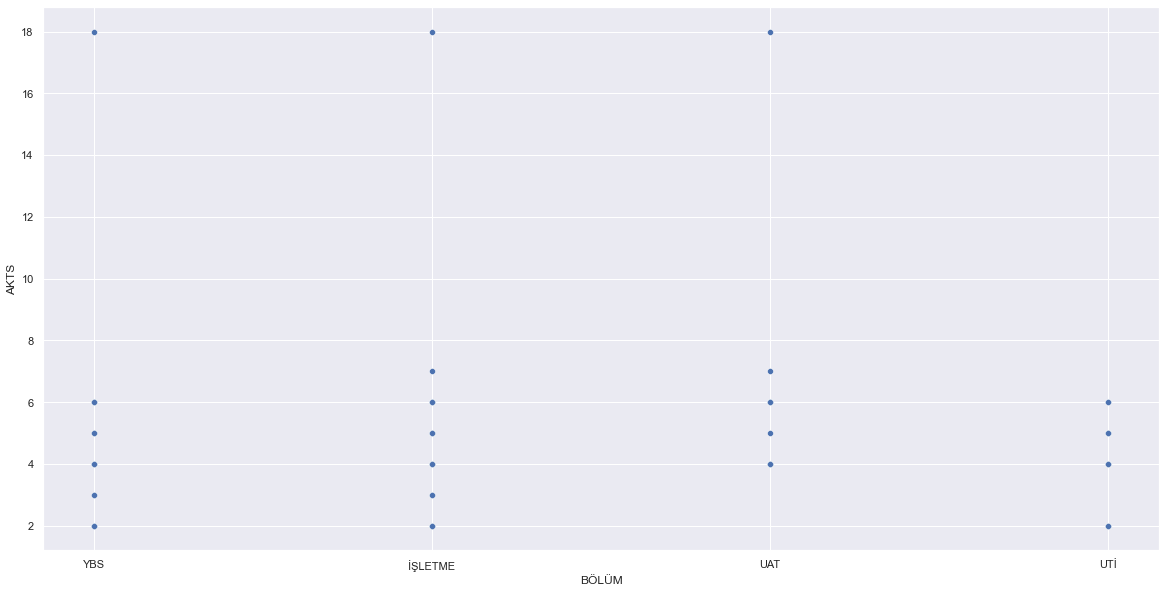

In [13]:
plt.figure(figsize=(20,10))
sbn.set_theme(style="darkgrid")
sbn.scatterplot(x="BÖLÜM",y="AKTS",data=veri);
#plt.savefig("bölüm-akts.png")

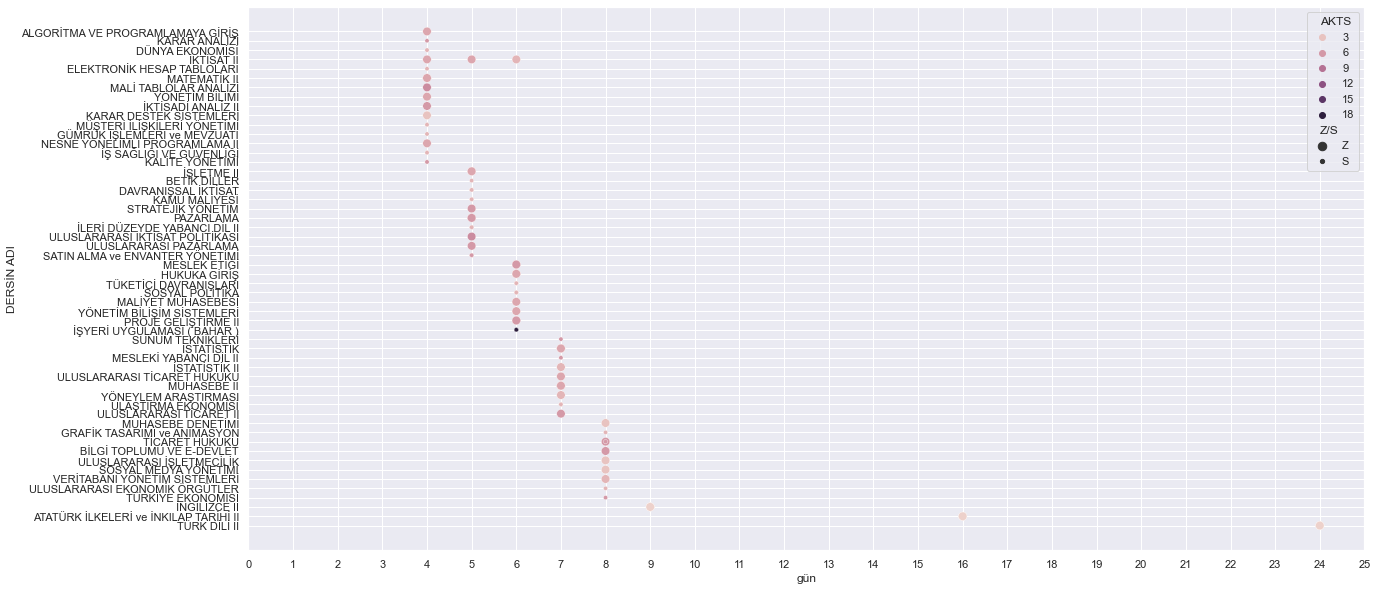

In [14]:
plt.figure(figsize=(20,10))
sbn.set_theme(style="darkgrid")
g = sbn.scatterplot(x="gün",y="DERSİN ADI",data=veri,hue="AKTS",size="Z/S");
g.set_xticks(range(len(veri.loc[:25])));
#plt.savefig("gün-dersinadi-akts-zs.png")

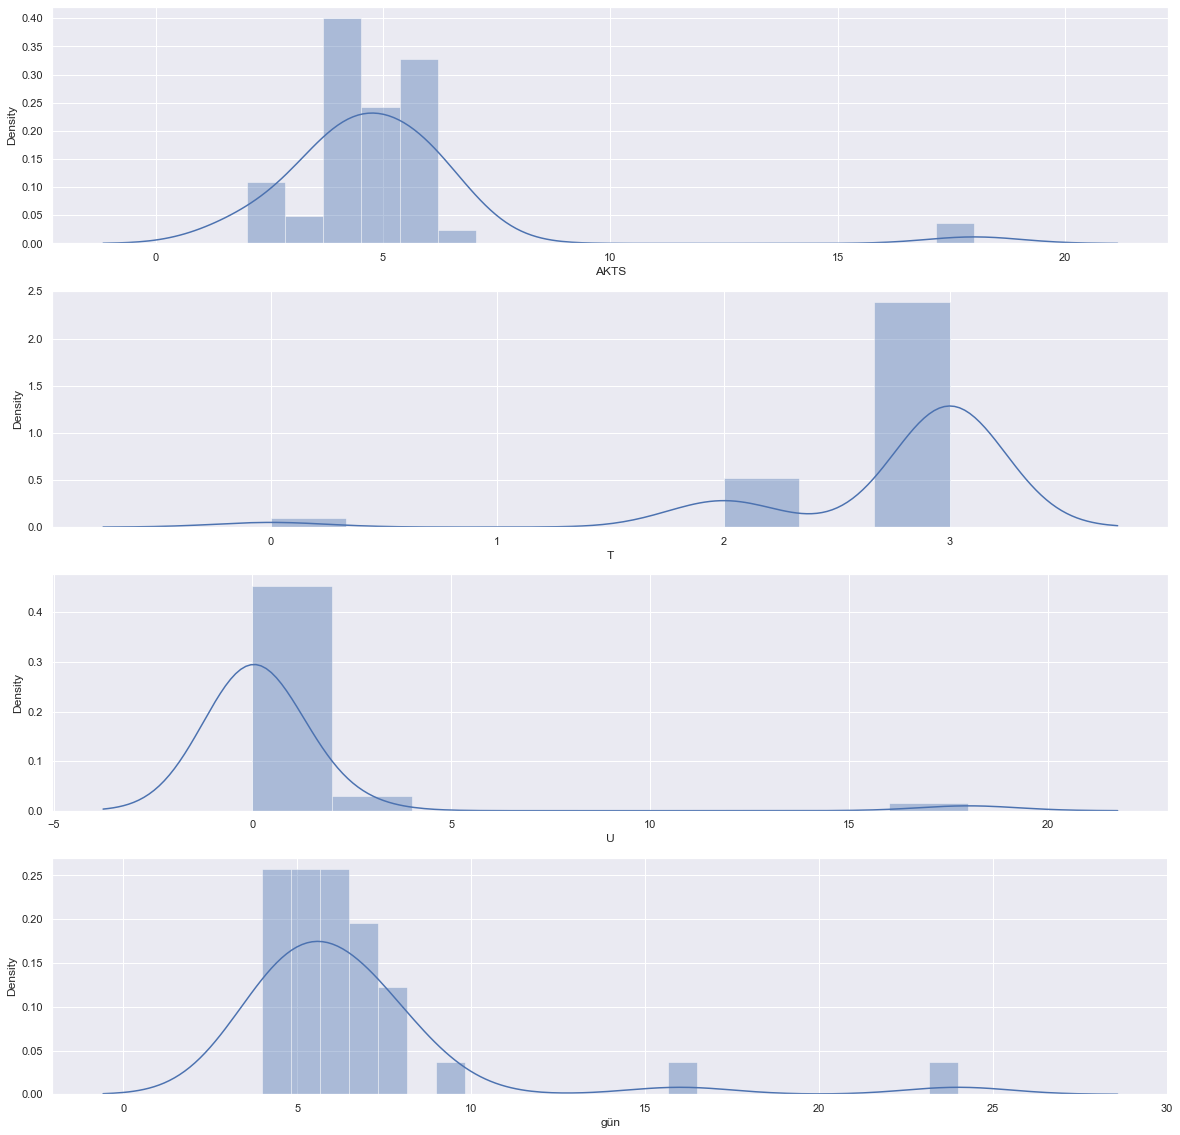

In [15]:
sbn.set_theme(style="darkgrid")
plt.figure(figsize=(20,20))
plt.subplot(4,1,1)
sbn.distplot(veri["AKTS"]);
plt.subplot(4,1,2)
sbn.distplot(veri["T"]);
plt.subplot(4,1,3)
sbn.distplot(veri["U"]);
plt.subplot(4,1,4)
sbn.distplot(veri["gün"]);
#plt.savefig("dağılımlar.png")

In [20]:
veri["DERSİN KODU"]

0     IYZ1202
1     IIS4204
2     IUS4106
3     IUS3104
4     IUZ1102
       ...   
93     AIT102
94     AIT102
95     TUD102
96     TUD102
97     TUD102
Name: DERSİN KODU, Length: 98, dtype: object